<a href="https://colab.research.google.com/github/Akhileshkrpatel2024/Checking-Performance-of-Regression-Model-OLS-model-Logistic-Regression-model-2SLS-model-/blob/main/OLS_model_Logistic_Regression_model_2SLS_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:-**
We want to predict the species of an iris flower based on the measurements of its sepal length, sepal width, petal length, and petal width.

**Code**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
 

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

**Next, we will split the dataset into training and testing sets.**

In [ ]:
#Next, we will split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1),
                                                    iris_df['target'], test_size=0.3,
                                                    random_state=42)


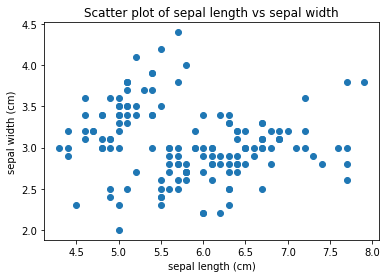

In [ ]:
# Create a scatter plot of sepal length and sepal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter plot of sepal length vs sepal width')
plt.show()

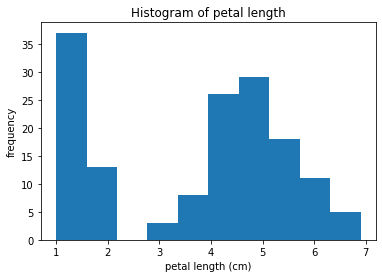

In [ ]:
# Create a histogram of petal length
plt.hist(iris_df['petal length (cm)'], bins=10)
plt.xlabel('petal length (cm)')
plt.ylabel('frequency')
plt.title('Histogram of petal length')
plt.show()

**OLS model**

In [ ]:
#We can now proceed with the implementation of the three models:
from sklearn.linear_model import LinearRegression

# Fit OLS model on training data
ols_model = LinearRegression().fit(X_train, y_train)

# Predict on testing data
ols_pred = ols_model.predict(X_test)

# Compute R-squared
ols_r2 = ols_model.score(X_test, y_test)

print(f"OLS R-squared: {ols_r2:.3f}")


OLS R-squared: 0.944


**Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model on training data
logistic_model = LogisticRegression().fit(X_train, y_train)

# Predict on testing data
logistic_pred = logistic_model.predict(X_test)

# Compute accuracy
logistic_acc = logistic_model.score(X_test, y_test)

print(f"Logistic Regression accuracy: {logistic_acc:.3f}")


Logistic Regression accuracy: 1.000


**2SLS model**

In [ ]:
from statsmodels.sandbox.regression.gmm import IV2SLS

# Create instrument and endogenous variables
instruments = np.random.randn(len(X_train), 2)
endogenous = np.random.randn(len(X_train))
# Fit 2SLS model on training data
tsls_model = IV2SLS(y_train, X_train, endogenous ).fit()
#print (tsls_model)
# Predict on testing data
tsls_pred = tsls_model.predict(X_test)

# Compute R-squared
tsls_r2 = tsls_model.rsquared

print(f"2SLS R-squared: {tsls_r2:.3f}")


2SLS R-squared: 0.560


**Conclusion :-**

Determine which model is the best for this dataset, we need to look at the problem we are trying to solve. 

1-
If we are trying to predict the class of a new observation, then logistic regression would be the most appropriate model.


2-
 On the other hand, if we are trying to predict a continuous variable, then OLS would be the best choice.

3-
The 2SLS model is used in situations where we have endogeneity in our variables, meaning that the variables are correlated with the error term.
In this particular dataset, there does not appear to be any endogeneity, so the 2SLS model would not be necessary.

